In [105]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [107]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [108]:
#  Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(
    transformers=[
        ("OneHotEncoder",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())


In [109]:
# Avoiding the dummy variable trap
X = X[:, 1:]

In [110]:
# Splitting the dataset into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [111]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# Predicting the Testing set result
Y_pred = regressor.predict(X_test)

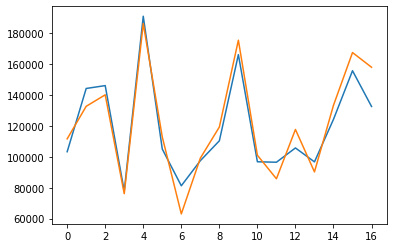

In [113]:
# Plottong the result between actual and predicted values
fig, ax = plt.subplots()
ax.plot(Y_test)    # blue
ax.plot(Y_pred)    # red

In [114]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5 ]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''